In [182]:
# Import Dependencies
import os
from dotenv import load_dotenv
import requests
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [183]:
# RUN ONCE
load_dotenv()
API_KEY = os.getenv('SPECIAL_API_KEY')

In [184]:
# RUN ONCE
params = {
 'function': 'CRYPTO_INTRADAY',
 'symbol': 'ETH',
 'market': 'USD',
 'interval': '5min',
 'time_zone': 'US/Eastern Time',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
price_data = r.json()
print(price_data.keys())
r.close()

https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=ETH&market=USD&interval=5min&time_zone=US%2FEastern+Time&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Time Series Crypto (5min)'])


In [185]:
price_df = pd.DataFrame(price_data['Time Series Crypto (5min)']).T
print(price_data['Meta Data'])
price_df.reset_index(inplace=True)
price_df['date.utc'] = price_df['index']
price_df = price_df.drop('index', 1)
price_df.head()

{'1. Information': 'Crypto Intraday (5min) Time Series', '2. Digital Currency Code': 'ETH', '3. Digital Currency Name': 'Ethereum', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2021-12-28 04:30:00', '7. Interval': '5min', '8. Output Size': 'Compact', '9. Time Zone': 'UTC'}


/tmp/ipykernel_202/2187447110.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price_df = price_df.drop('index', 1)


,1. open,2. high,3. low,4. close,5. volume,date.utc
0,3900.00000,3907.69000,3896.71000,3905.01000,611,2021-12-28 04:30:00
1,3899.20000,3900.65000,3888.44000,3900.01000,1482,2021-12-28 04:25:00
2,3898.70000,3909.46000,3877.00000,3899.20000,6181,2021-12-28 04:20:00
3,3932.91000,3933.45000,3890.22000,3898.70000,8651,2021-12-28 04:15:00
4,3943.72000,3944.73000,3931.65000,3933.24000,718,2021-12-28 04:10:00


In [186]:
# RUN ONCE
params = {
 'function': 'BBANDS',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'time_period': '20',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
bband_data = r.json()
print(bband_data.keys())
r.close()

https://www.alphavantage.co/query?function=BBANDS&symbol=ETHUSD&interval=5min&time_period=20&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])


In [187]:
bbands_df = pd.DataFrame(bband_data['Technical Analysis: BBANDS']).T
print(bband_data['Meta Data'])
bbands_df.reset_index(inplace=True)
bbands_df['date.est1'] = bbands_df['index']
bbands_df = bbands_df.drop('index', 1)
bbands_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Bollinger Bands (BBANDS)', '3: Last Refreshed': '2021-12-27 23:30:00', '4: Interval': '5min', '5: Time Period': 20, '6.1: Deviation multiplier for upper band': 2, '6.2: Deviation multiplier for lower band': 2, '6.3: MA Type': 0, '7: Series Type': 'close', '8: Time Zone': 'US/Eastern Time'}


/tmp/ipykernel_202/2181832318.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bbands_df = bbands_df.drop('index', 1)


,Real Middle Band,Real Upper Band,Real Lower Band,date.est1
0,3939.2355,3981.1307,3897.3403,2021-12-27 23:30
1,3942.2110,3982.3779,3902.0441,2021-12-27 23:25
2,3945.3890,3981.5558,3909.2222,2021-12-27 23:20
3,3949.1180,3980.5336,3917.7024,2021-12-27 23:15
4,3952.9850,3976.7271,3929.2429,2021-12-27 23:10


In [188]:
# RUN ONCE
params = {
 'function': 'MACD',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
macd_data = r.json()
print(macd_data.keys())
r.close()

https://www.alphavantage.co/query?function=MACD&symbol=ETHUSD&interval=5min&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: MACD'])


In [189]:
macd_df = pd.DataFrame(macd_data['Technical Analysis: MACD']).T
print(macd_data['Meta Data'])
macd_df.reset_index(inplace=True)
macd_df['date.est2'] = macd_df['index']
macd_df = macd_df.drop('index', 1)
macd_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Moving Average Convergence/Divergence (MACD)', '3: Last Refreshed': '2021-12-27 23:30:00', '4: Interval': '5min', '5.1: Fast Period': 12, '5.2: Slow Period': 26, '5.3: Signal Period': 9, '6: Series Type': 'close', '7: Time Zone': 'US/Eastern'}


/tmp/ipykernel_202/1630572137.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  macd_df = macd_df.drop('index', 1)


,MACD,MACD_Hist,MACD_Signal,date.est2
0,-19.3925,-3.2768,-16.1156,2021-12-27 23:30
1,-18.9066,-3.6102,-15.2964,2021-12-27 23:25
2,-17.5024,-3.1085,-14.3939,2021-12-27 23:20
3,-15.3730,-1.7562,-13.6168,2021-12-27 23:15
4,-12.3807,0.7971,-13.1777,2021-12-27 23:10


In [190]:
df = price_df.join(bbands_df, how = 'left')
df = df.join(macd_df, how = 'left')
df.head()

,1. open,2. high,3. low,4. close,5. volume,date.utc,Real Middle Band,Real Upper Band,Real Lower Band,date.est1,MACD,MACD_Hist,MACD_Signal,date.est2
0,3900.00000,3907.69000,3896.71000,3905.01000,611,2021-12-28 04:30:00,3939.2355,3981.1307,3897.3403,2021-12-27 23:30,-19.3925,-3.2768,-16.1156,2021-12-27 23:30
1,3899.20000,3900.65000,3888.44000,3900.01000,1482,2021-12-28 04:25:00,3942.2110,3982.3779,3902.0441,2021-12-27 23:25,-18.9066,-3.6102,-15.2964,2021-12-27 23:25
2,3898.70000,3909.46000,3877.00000,3899.20000,6181,2021-12-28 04:20:00,3945.3890,3981.5558,3909.2222,2021-12-27 23:20,-17.5024,-3.1085,-14.3939,2021-12-27 23:20
3,3932.91000,3933.45000,3890.22000,3898.70000,8651,2021-12-28 04:15:00,3949.1180,3980.5336,3917.7024,2021-12-27 23:15,-15.3730,-1.7562,-13.6168,2021-12-27 23:15
4,3943.72000,3944.73000,3931.65000,3933.24000,718,2021-12-28 04:10:00,3952.9850,3976.7271,3929.2429,2021-12-27 23:10,-12.3807,0.7971,-13.1777,2021-12-27 23:10


In [191]:
# Dictionary with original and new column names.
new_col_names = {'1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume',
        'Real Middle Band': 'bband.mid',
        'Real Upper Band': 'bband.up',
        'Real Lower Band': 'bband.low',
        'MACD_Signal': 'macd.sig',
        'MACD_Hist': 'macd.hist',
        'MACD': 'macd'}
  
# Call rename() method. 
df.rename(columns= new_col_names,
          inplace=True)

In [192]:
df = df.drop(['date.est1', 'date.est2'], 1)
df['date.utc'] = pd.to_datetime(df['date.utc'])
df = df.set_index('date.utc')

/tmp/ipykernel_202/3001725684.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['date.est1', 'date.est2'], 1)


In [193]:
df['open'] = df['open'].astype(str).astype(float)
df['high'] = df['high'].astype(str).astype(float)
df['low'] = df['low'].astype(str).astype(float)
df['close'] = df['close'].astype(str).astype(float)
df['volume'] = df['volume'].astype(str).astype(float)
df['bband.low'] = df['bband.low'].astype(str).astype(float)
df['bband.up'] = df['bband.up'].astype(str).astype(float)
df['bband.mid'] = df['bband.mid'].astype(str).astype(float)
df['macd'] = df['macd'].astype(str).astype(float)
df['macd.hist'] = df['macd.hist'].astype(str).astype(float)
df['macd.sig'] = df['macd.sig'].astype(str).astype(float)

In [194]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2021-12-28 04:30:00 to 2021-12-27 20:15:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       100 non-null    float64
 1   high       100 non-null    float64
 2   low        100 non-null    float64
 3   close      100 non-null    float64
 4   volume     100 non-null    float64
 5   bband.mid  100 non-null    float64
 6   bband.up   100 non-null    float64
 7   bband.low  100 non-null    float64
 8   macd       100 non-null    float64
 9   macd.hist  100 non-null    float64
 10  macd.sig   100 non-null    float64
dtypes: float64(11)
memory usage: 9.4 KB
None


In [195]:
df.head()

,open,high,low,close,volume,bband.mid,bband.up,bband.low,macd,macd.hist,macd.sig
date.utc,,,,,,,,,,,
2021-12-28 04:30:00,3900.00,3907.69,3896.71,3905.01,611.0,3939.2355,3981.1307,3897.3403,-19.3925,-3.2768,-16.1156
2021-12-28 04:25:00,3899.20,3900.65,3888.44,3900.01,1482.0,3942.2110,3982.3779,3902.0441,-18.9066,-3.6102,-15.2964
2021-12-28 04:20:00,3898.70,3909.46,3877.00,3899.20,6181.0,3945.3890,3981.5558,3909.2222,-17.5024,-3.1085,-14.3939
2021-12-28 04:15:00,3932.91,3933.45,3890.22,3898.70,8651.0,3949.1180,3980.5336,3917.7024,-15.3730,-1.7562,-13.6168
2021-12-28 04:10:00,3943.72,3944.73,3931.65,3933.24,718.0,3952.9850,3976.7271,3929.2429,-12.3807,0.7971,-13.1777


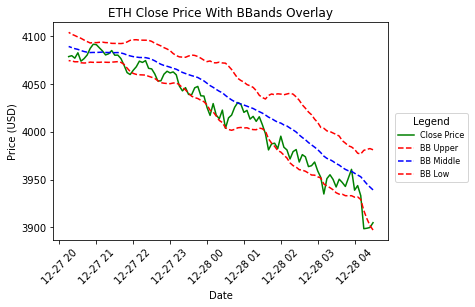

In [196]:
# Case Study 5
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set title and axes labels
axs.set_title("ETH Close Price With BBands Overlay")
axs.set_xlabel("Date")
axs.set_ylabel("Price (USD)")

# Create the plot 
axs.plot(df['close'], "-", label = "Close Price", color = "green")
axs.plot(df['bband.up'], "--", label = "BB Upper", color = "red")
axs.plot(df['bband.mid'], "--", label = "BB Middle", color = "blue")
axs.plot(df['bband.low'], "--", label = "BB Low", color = "red")
axs.legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)

# Show 
plt.show()

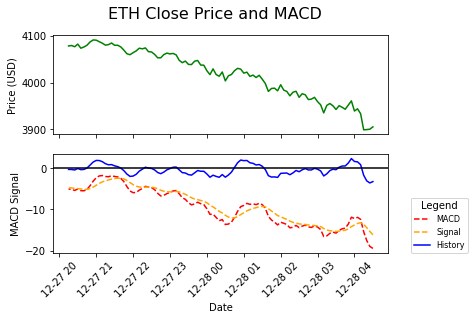

In [197]:
# Define figure and axis
fig, axs = plt.subplots(2,1, sharex=True)

# Set title and axes labels
fig.suptitle(t = "ETH Close Price and MACD", fontsize = 16)
#axs.set_title("ETH Close Price With MACD Overlay")

axs[1].set_xlabel("Date")
axs[0].set_ylabel("Price (USD)")
axs[1].set_ylabel("MACD Signal")


    
# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")

axs[1].plot(df['macd'], "--", label = "MACD", color = "red")
axs[1].plot(df['macd.sig'], "--", label = "Signal", color = "orange")
axs[1].plot(df['macd.hist'], "-", label = "History", color = "blue")
axs[1].legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)
axs[1].axhline(y=0, color = 'black')

# Show 
plt.show()